In [1]:
import sys
src_path = '/kaggle/input/fraud-detection-ml-project-code-and-ml-pipeline/src'
sys.path.append(src_path)

# Now you can try to import from your utilities file
# from utilities import some_function  # Uncomment when you have functions to import


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the main data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class Counts:
Class
0    284315
1       492
Name: count, dtype: int64


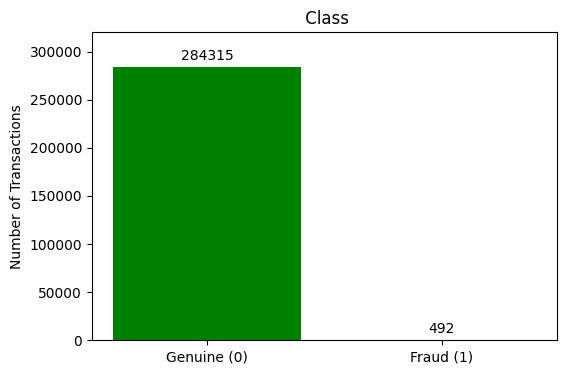

In [4]:
# Checking the class imbalance
class_counts = df['Class'].value_counts()
print("Class Counts:")
print(class_counts)

plt.figure(figsize=(6,4))
_barplot = plt.bar(['Genuine (0)', 'Fraud (1)'], class_counts.values, color=['green', 'red'])
plt.title(' Class')
plt.ylabel('Number of Transactions')
plt.bar_label(_barplot, padding=3)
plt.ylim(0, 320000)
plt.savefig('/kaggle/working/class_imbalance.png') # Saves the plot
plt.show()

### Highly Imbalanced Dataset!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking for missing data 
df.isna().sum()
# No empty data fields

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### No Null or missing values

In [7]:
# Check for duplicated values

duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [8]:
duplicate[duplicate['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102442,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102443,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102444,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102445,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102446,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
141260,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
150661,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1


There seem to be duplicate values in both classes but as the Fraud data is precious I will keep everything for now.   

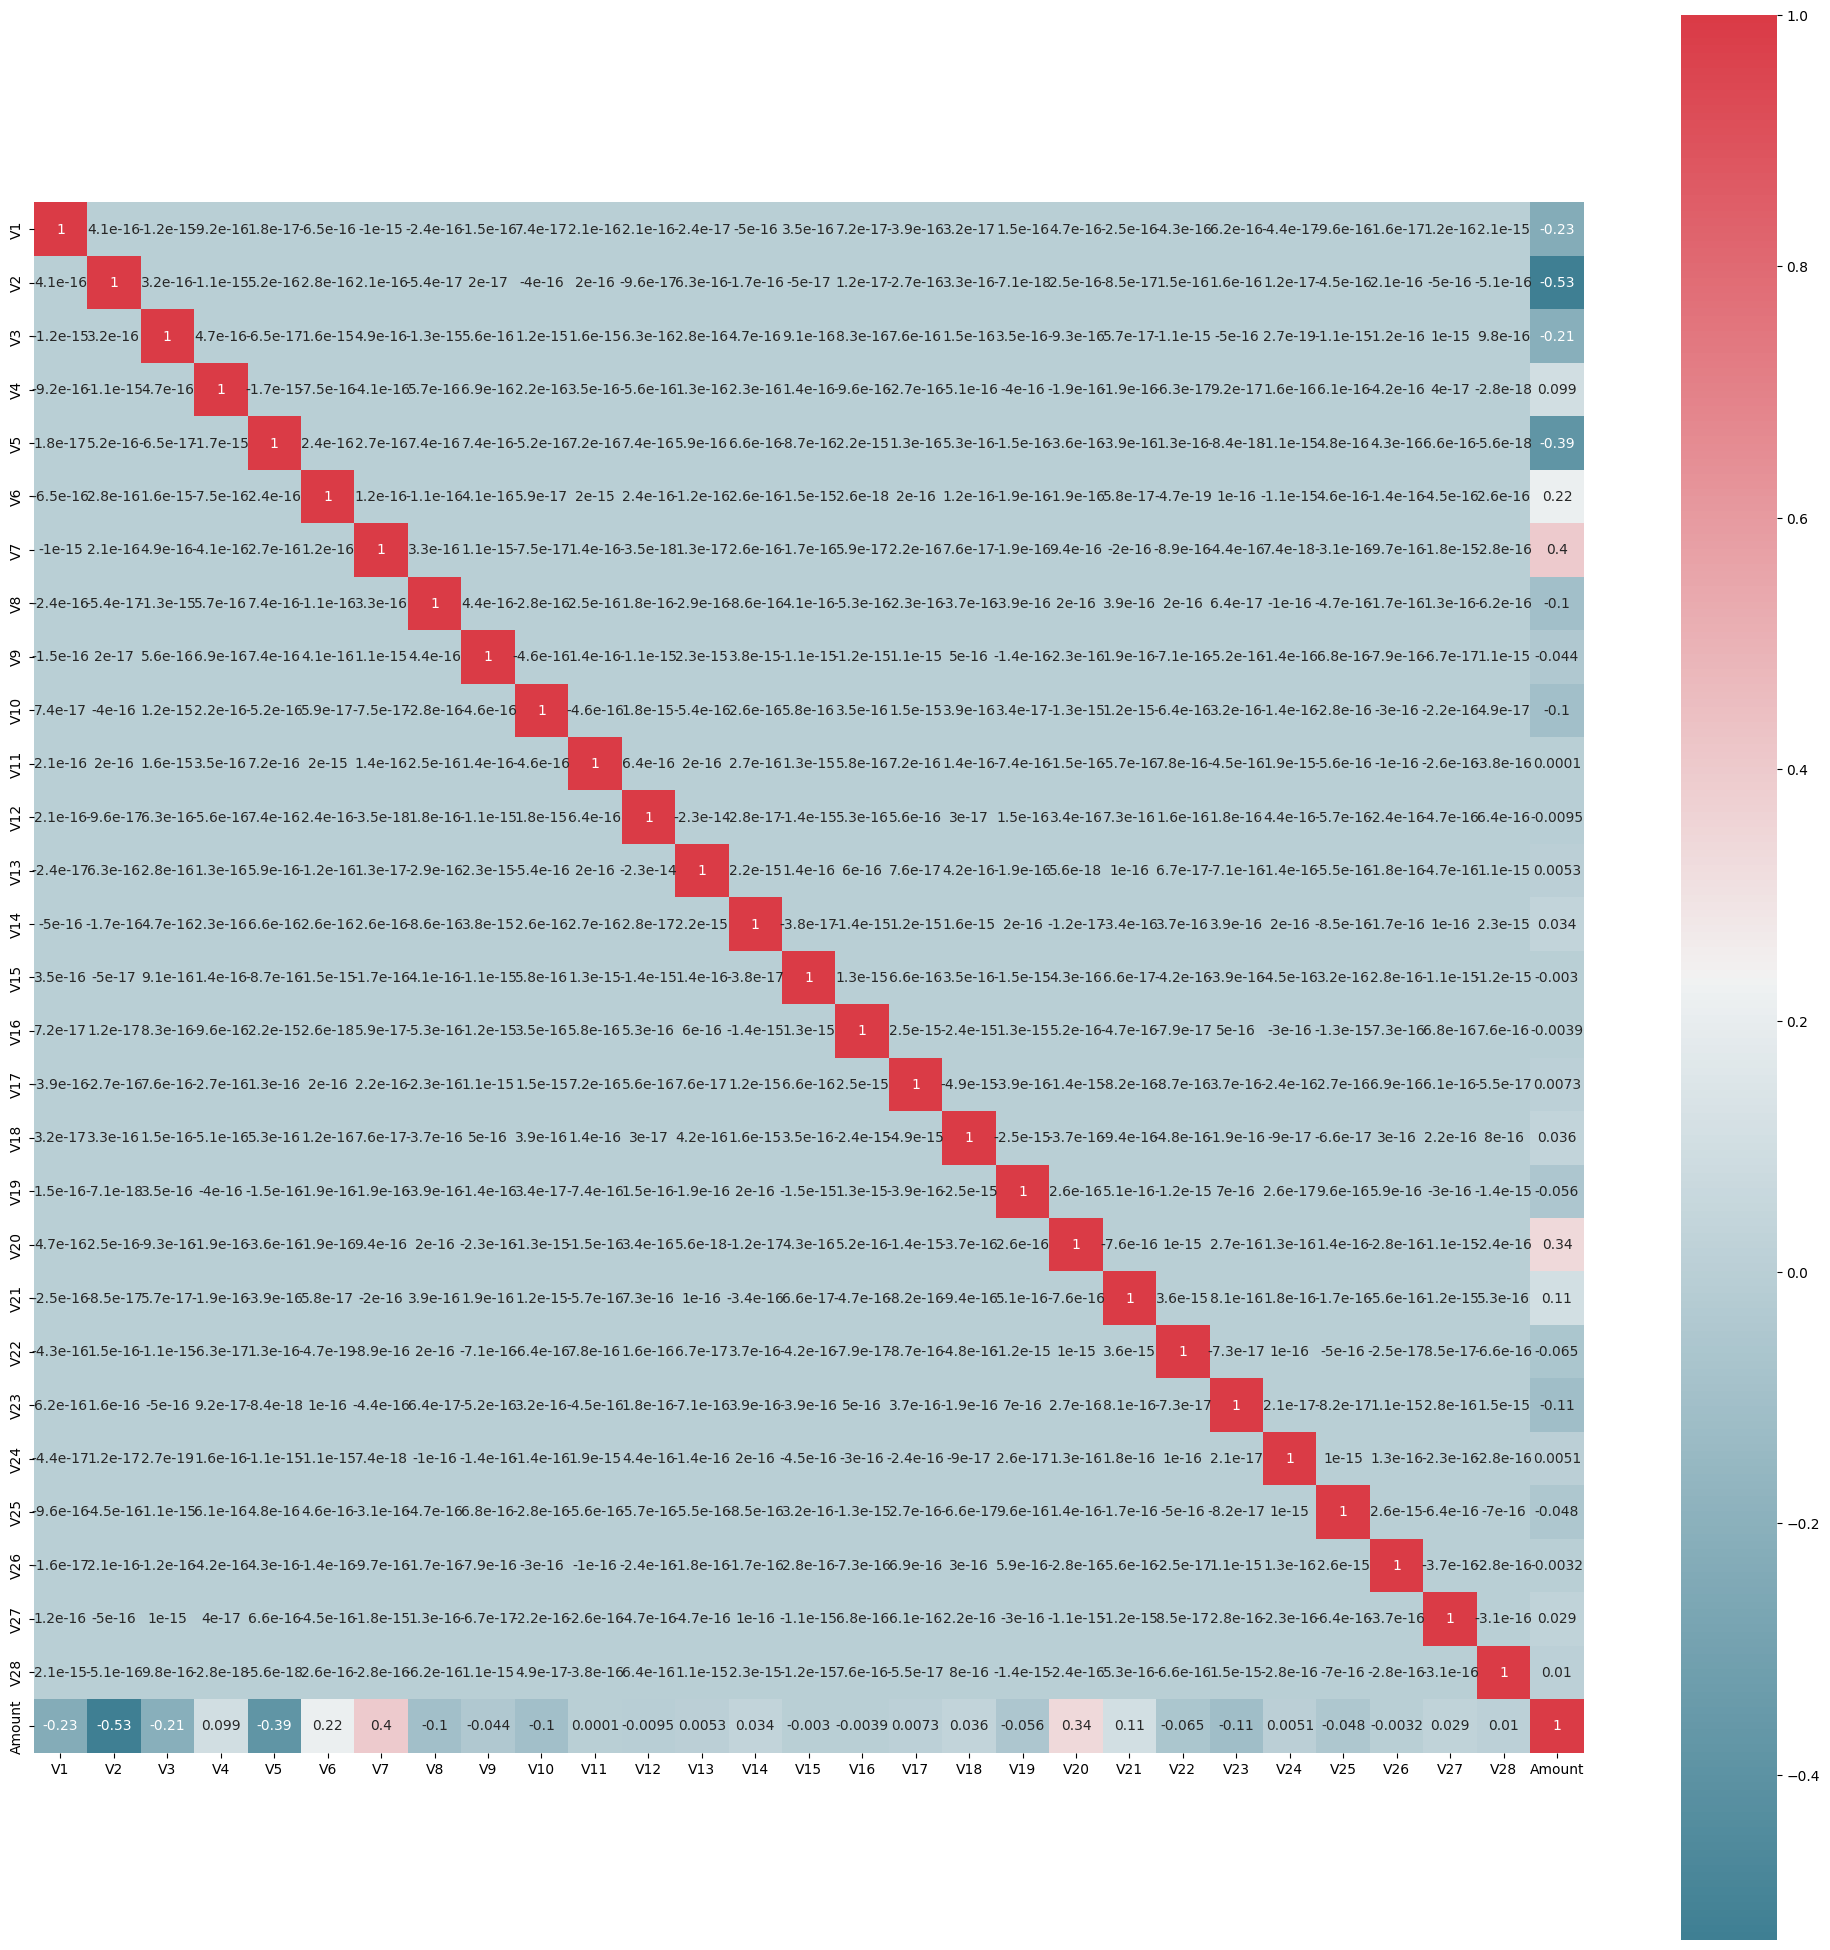

In [9]:
categorical_headers = ["Time","Class"]
numeric_headers = [i for i in df.columns if i not in categorical_headers]
plt.figure(figsize=(25, 25))
corr=df[numeric_headers].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.show()

The PCA output variable are all uncorrelated with each other as expected but there are some correlation to the Amount.

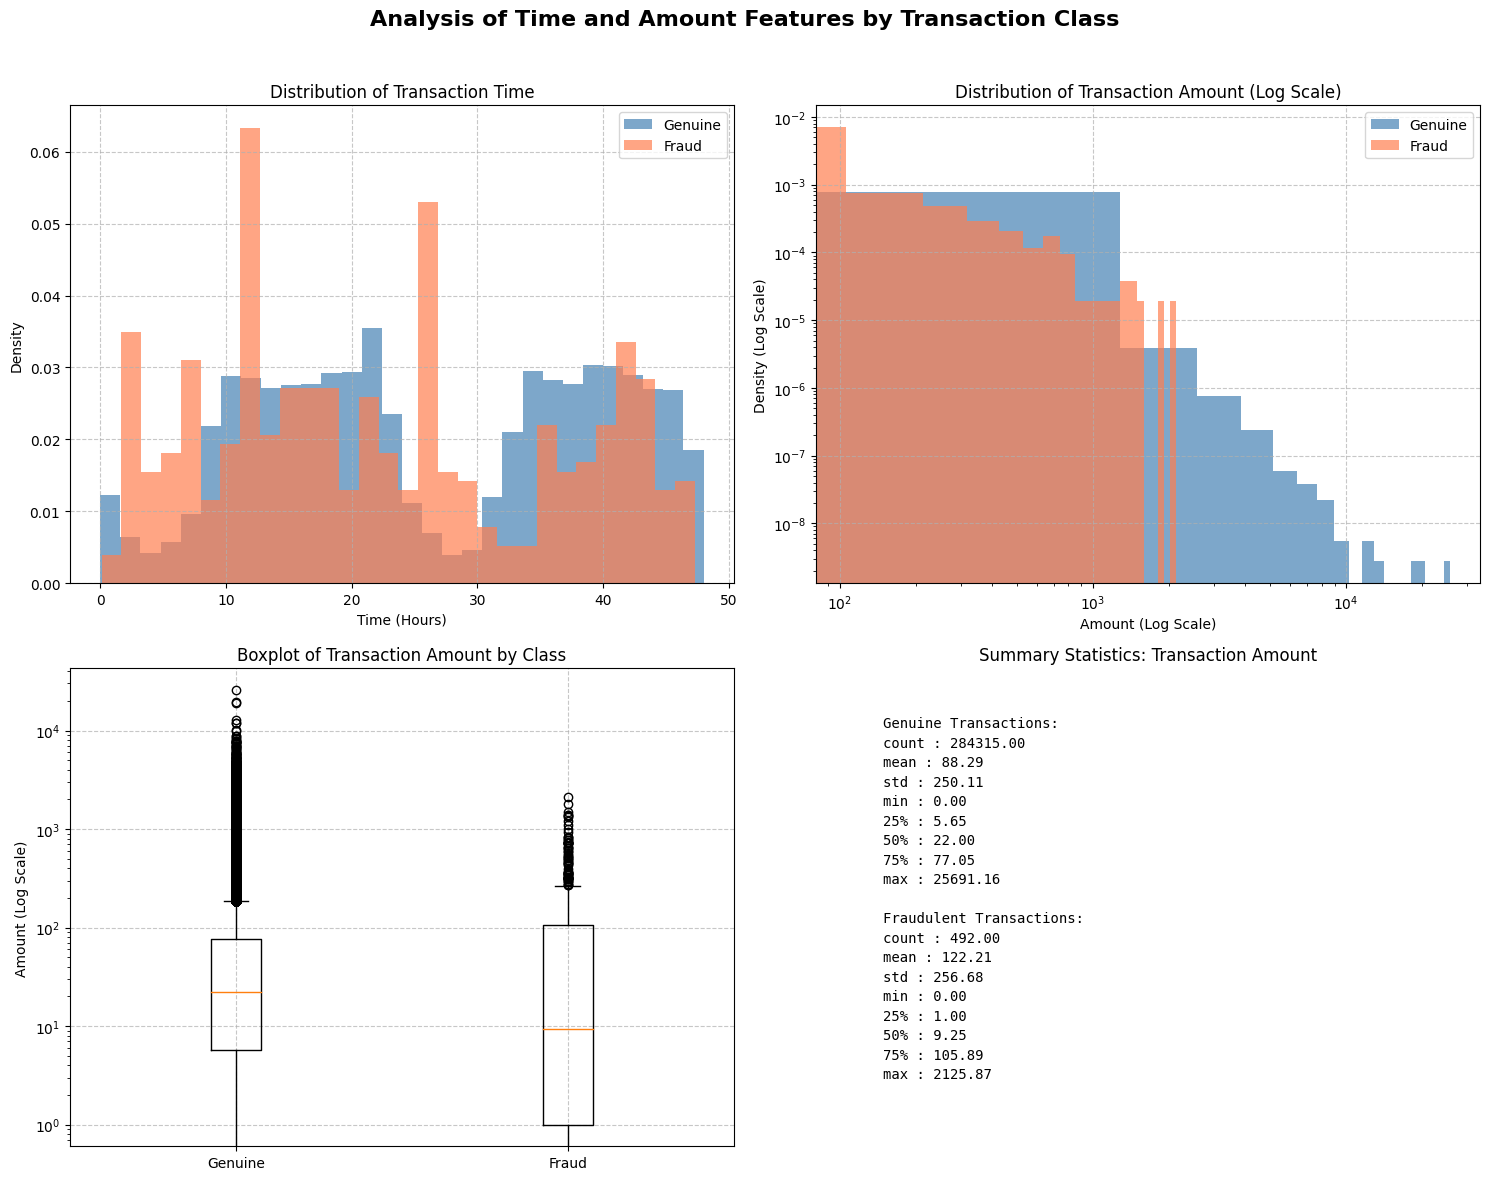

In [10]:
# Exploratory Data Analysis - Time and Amount Features
df['Time_Hours'] = df['Time'] / 3600

genuine = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Analysis of Time and Amount Features by Transaction Class', fontsize=16, fontweight='bold')

# --- Plot 1: Distribution of Time for Genuine vs. Fraudulent Transactions ---
# Convert Time from seconds to hours for easier interpretation
df['Time_Hours'] = df['Time'] / 3600

genuine = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

axes[0,0].hist(genuine['Time_Hours'], bins=30, density=True, alpha=0.7, label='Genuine', color='steelblue')
axes[0,0].hist(fraud['Time_Hours'], bins=30, density=True, alpha=0.7, label='Fraud', color='coral')
axes[0,0].set_xlabel('Time (Hours)')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('Distribution of Transaction Time')
axes[0,0].legend()
axes[0,0].grid(True, linestyle='--', alpha=0.7)

# --- Plot 2: Distribution of Transaction Amount ---
# Use log scale for the x-axis due to extreme skewness
axes[0,1].hist(genuine['Amount'], bins=20, density=True, alpha=0.7, label='Genuine', color='steelblue', log=True)
axes[0,1].hist(fraud['Amount'], bins=20, density=True, alpha=0.7, label='Fraud', color='coral', log=True)
axes[0,1].set_xscale('log')
axes[0,1].set_xlabel('Amount (Log Scale)')
axes[0,1].set_ylabel('Density (Log Scale)')
axes[0,1].set_title('Distribution of Transaction Amount (Log Scale)')
axes[0,1].legend()
axes[0,1].grid(True, linestyle='--', alpha=0.7)

# --- Plot 3: Boxplot of Amount by Class (Showcasing outliers) ---
# Use a logarithmic scale for the y-axis again to make the plot readable
boxplot_data = [genuine['Amount'].values, fraud['Amount'].values]
axes[1,0].boxplot(boxplot_data, labels=['Genuine', 'Fraud'], showfliers=True) # showfliers=True shows outliers
axes[1,0].set_yscale('log')
axes[1,0].set_ylabel('Amount (Log Scale)')
axes[1,0].set_title('Boxplot of Transaction Amount by Class')
axes[1,0].grid(True, linestyle='--', alpha=0.7)

# --- Plot 4: Summary Statistics ---
# Let's create a text summary instead of a blank plot
stats_text=""
stats_text+="Genuine Transactions:\n"
for name,value in genuine['Amount'].describe().items():
    stats_text+=f"{name} : {value:.2f} \n"
stats_text+="\nFraudulent Transactions:\n"
for name,value in fraud['Amount'].describe().items():
    stats_text+=f"{name} : {value:.2f} \n"
axes[1,1].text(0.1, 0.9, stats_text, fontsize=10, va='top', ha='left', linespacing=1.5, fontfamily='monospace')
axes[1,1].set_title('Summary Statistics: Transaction Amount')
axes[1,1].set_axis_off() # Hide the axes for this text plot

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for the main title
plt.savefig('/kaggle/working/feature_analysis.png', dpi=120, bbox_inches='tight')
plt.show()


#### The fraudulent transactions seem to appear evenly distributed in time as genuine transactions.
#### The amount of fradulent transactions seem to be in smaller amount compared to genuine transactions. Fradulent transactions is hightly concentrated from \\$1 to ~\\$100

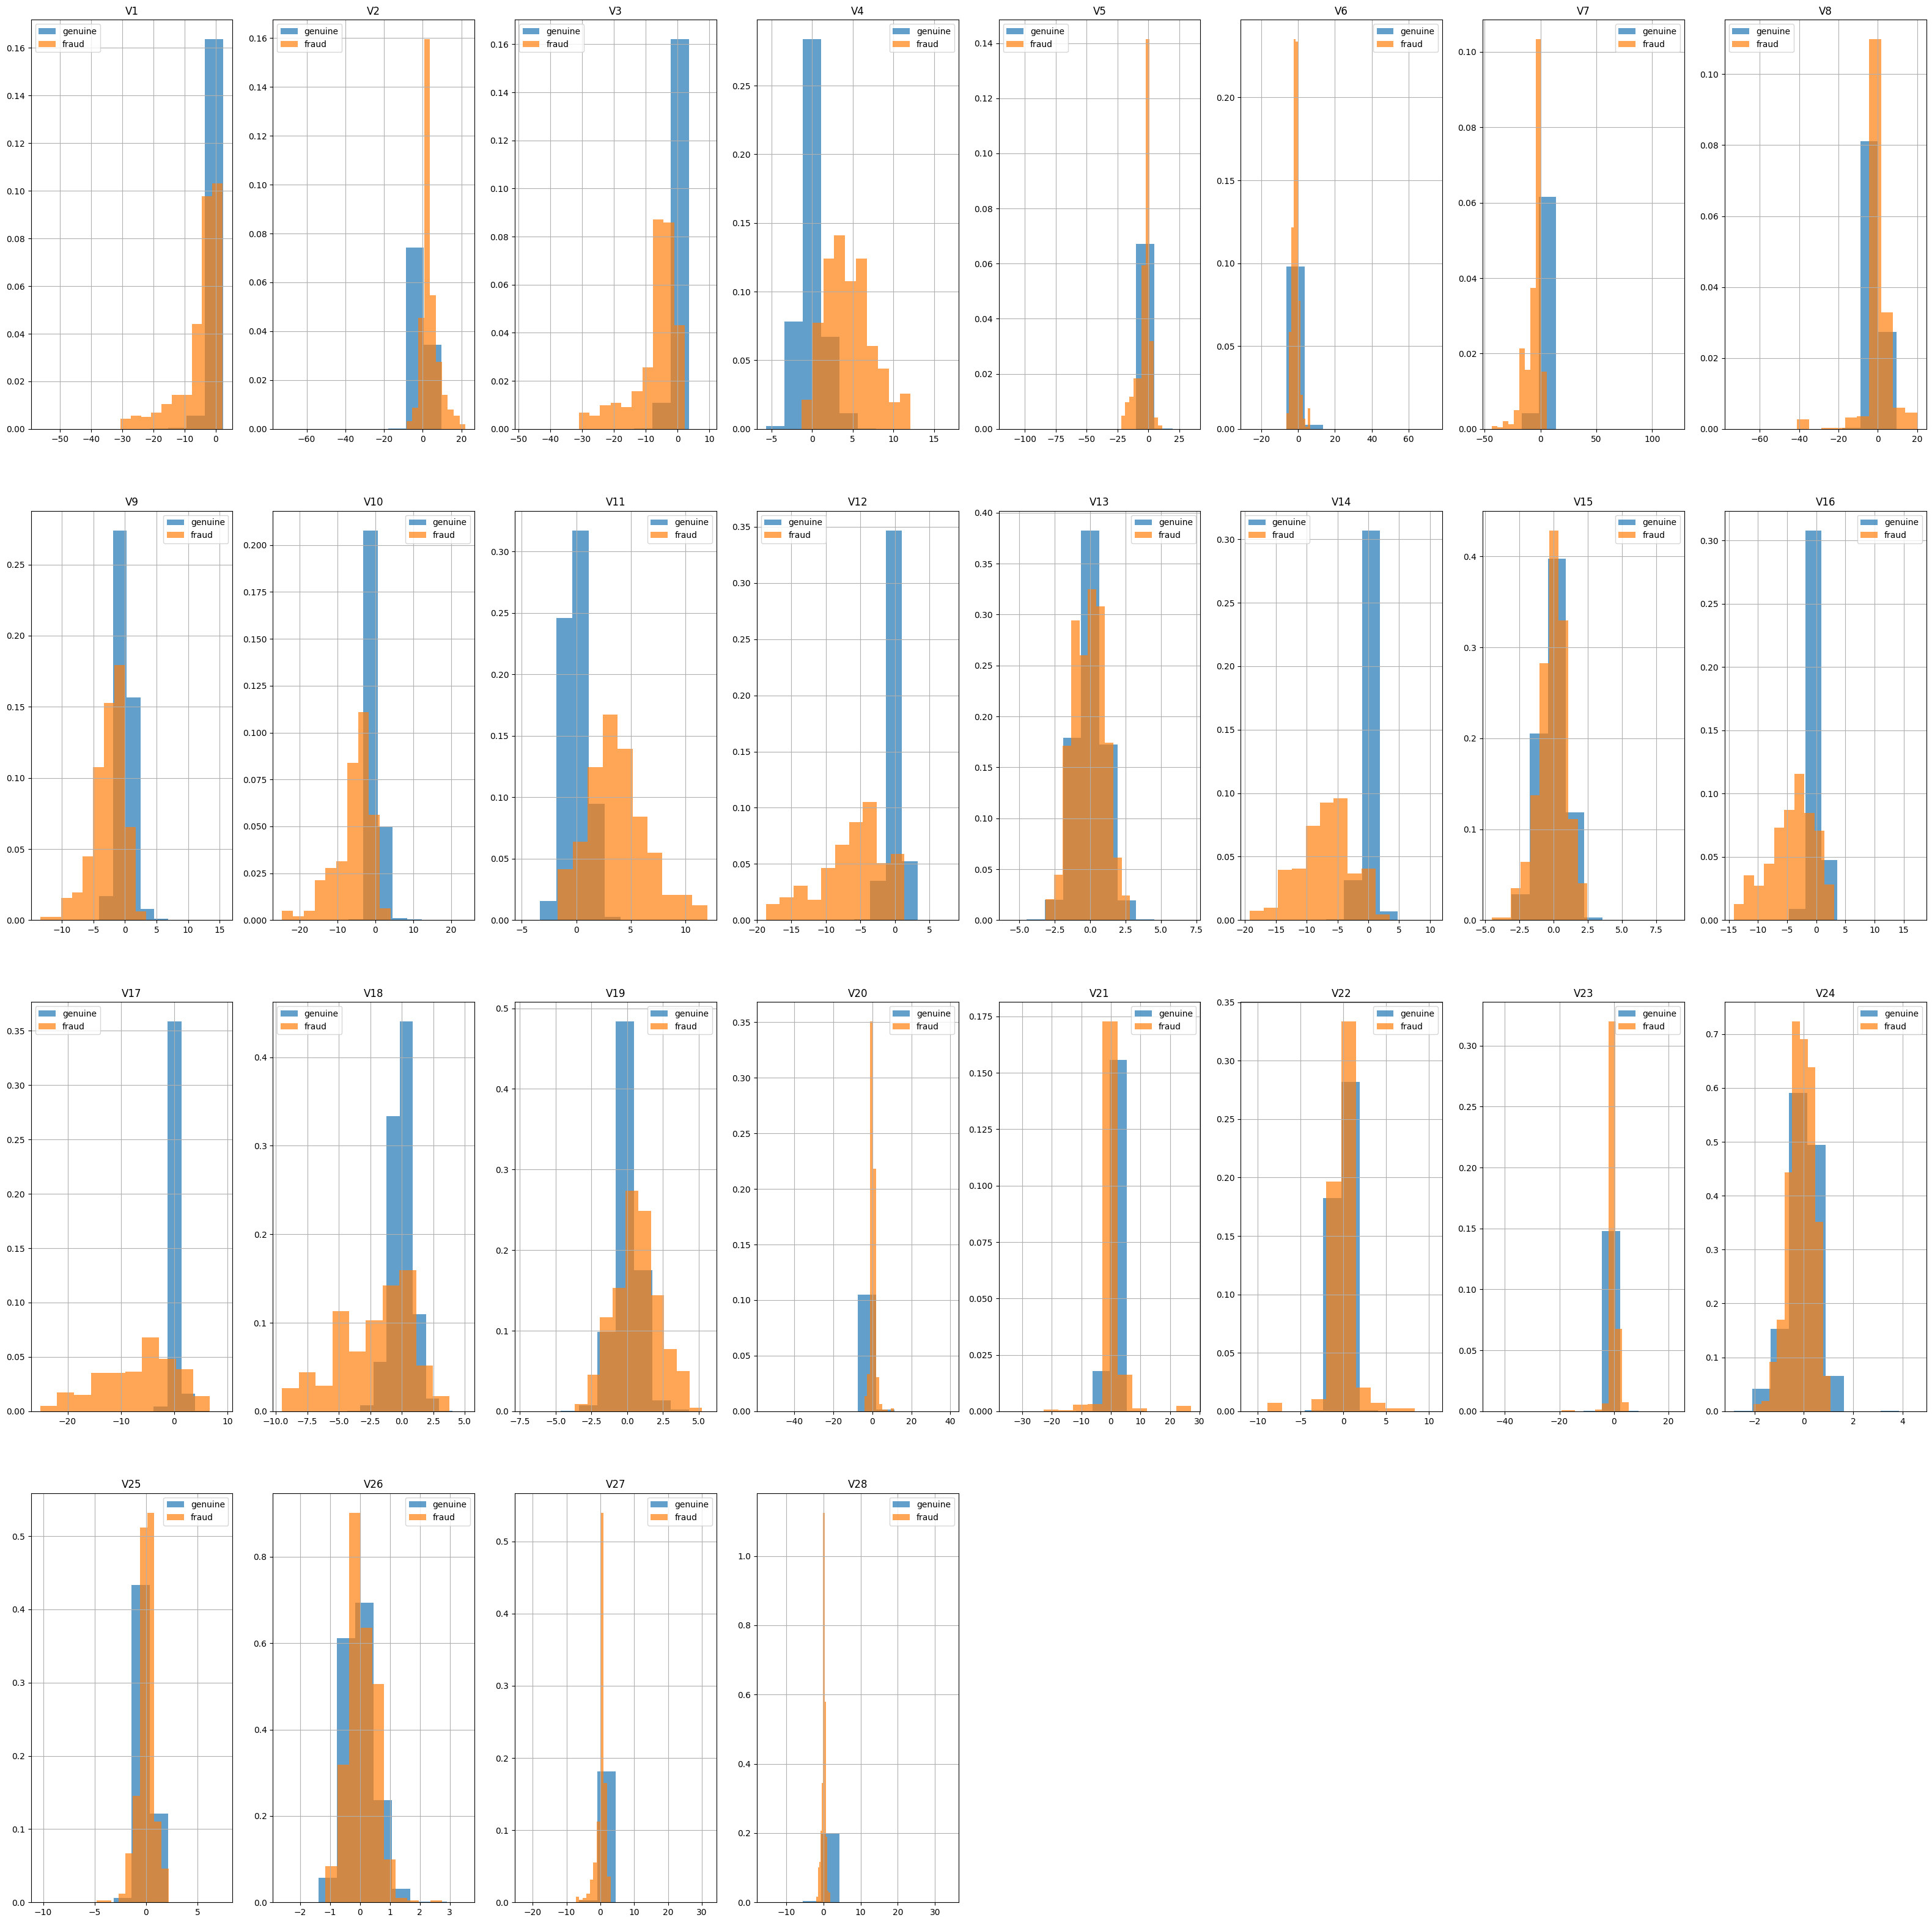

In [11]:
plt.figure(figsize=(40,40))
for i,c in enumerate(numeric_headers[:-1]):
    plt.subplot(4,8,i+1)
    genuine[c].hist(density=True,label='genuine',alpha=0.7)
    fraud[c].hist(density=True,label='fraud',alpha=0.7)
    plt.legend()
    plt.title(c)
plt.savefig('/kaggle/working/feature_plots.png')
plt.show()


### There are definetly a lot of variable which are seperating genuine and fradulent transactions. It easier to say just by looking at the plots above V8, V13, V15, V21, V22, V24,V 26 are some example where there are not much seperation. Let's normalize these varaible to be between -1 and 1. 

In [12]:
# Data Preprocessing & Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight


# Handle the 'Time' feature - Let's create a more meaningful 'HourOfDay' feature
df['HourOfDay'] = (df['Time'] // 3600) % 24  # Convert seconds since start to hour of day (0-23)

# Drop the original 'Time' column as we've extracted what we need
df_processed = df.drop(['Time'], axis=1)
df_processed = df_processed.drop(['Time_Hours'], axis=1)
df_processed = df_processed.drop(['HourOfDay'], axis=1)

# Define our features (X) and target (y)
# Use the PCA components (V1-V28) and amount features 
X = df_processed.drop('Class', axis=1)
y = df_processed['Class']

# 4. Split the data into training and testing sets
# STRATIFY is crucial here to preserve the class imbalance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,  
    stratify=y         
)


print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print(f"Fraud cases in training set: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.3f}%)")
print(f"Fraud cases in test set: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.3f}%)")


# Scale the features 
# Scaling after splitting to avoid data leakage from test set to training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training, transform training
X_test_scaled = scaler.transform(X_test)        # Transform test set using training fit

# Calculate class weights
# This tells the model "pay more attention to the rare class"
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
print(f"\nClass weights to handle imbalance: {class_weights_dict}")

# Save the processed data for modeling
np.save('/kaggle/working/X_train_scaled.npy', X_train_scaled)
np.save('/kaggle/working/X_test_scaled.npy', X_test_scaled)
np.save('/kaggle/working/y_train.npy', y_train)
np.save('/kaggle/working/y_test.npy', y_test)

print("\nPreprocessing complete! Data is ready for modeling.")

Training set shape: (227845, 29)
Test set shape: (56962, 29)
Fraud cases in training set: 394 (0.173%)
Fraud cases in test set: 98 (0.172%)

Class weights to handle imbalance: {0: 0.5008661206149896, 1: 289.14340101522845}

Preprocessing complete! Data is ready for modeling.


In [14]:
from utilities import *
# Initialize comparator with proper data split
comparator = ModelComparator(
    X_train=X_train_scaled, 
    y_train=y_train,
    X_test=X_test_scaled,    # TEST data - held out for final evaluation
    y_test=y_test,           # TEST labels
    class_weight=class_weights_dict[1]
)

# Optimize models (this will now use proper validation)
models_to_test = ['xgboost', 'lightgbm', 'dnn']

# Control the number of trials
for model_name in models_to_test:
    print(f"\n{'='*50}")
    print(f"Training {model_name.upper()}...")
    comparator.optimize_and_evaluate(model_name, n_trials=15)  # Reduced trials

# Get comparison results
comparison_df = comparator.get_comparison_dataframe()
print("\n📊 Model Comparison (Validation vs Test Performance):")
print(comparison_df.to_string(index=False, float_format='%.4f'))

[I 2025-09-10 01:47:19,590] A new study created in memory with name: no-name-0506c7ca-4979-426b-bdcc-6434a38e63c6



Training XGBOOST...
Optimizing xgboost...


[I 2025-09-10 01:47:20,883] Trial 0 finished with value: 0.789572446340309 and parameters: {'max_depth': 10, 'learning_rate': 0.07998508587474998, 'subsample': 0.7198591060019641, 'colsample_bytree': 0.776158818270331, 'gamma': 9.148453715154092, 'reg_alpha': 5.952461682066876, 'reg_lambda': 4.319044292055858, 'min_child_weight': 14}. Best is trial 0 with value: 0.789572446340309.
[I 2025-09-10 01:47:21,885] Trial 1 finished with value: 0.7161209726858966 and parameters: {'max_depth': 6, 'learning_rate': 0.006009088186322395, 'subsample': 0.8066224934186995, 'colsample_bytree': 0.8867098931286154, 'gamma': 5.318168334147449, 'reg_alpha': 6.680166982028547, 'reg_lambda': 1.5651254422305876, 'min_child_weight': 20}. Best is trial 0 with value: 0.789572446340309.
[I 2025-09-10 01:47:22,799] Trial 2 finished with value: 0.7631246207888303 and parameters: {'max_depth': 11, 'learning_rate': 0.07373956067958803, 'subsample': 0.7108839607177745, 'colsample_bytree': 0.6648955370124331, 'gamma':

xgboost complete. Val AUC-PR: 0.8274, Test AUC-PR: 0.8560

Training LIGHTGBM...
Optimizing lightgbm...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
[I 2025-09-10 01:47:40,777] Trial 0 finished with value: 0.4759141960398381 and parameters: {'num_leaves': 53, 'max_depth': 6, 'learning_rate': 0.06854962525619321, 'subsample': 0.9172430184271143, 'colsample_bytree': 0.8433202756999683, 'reg_alpha': 3.2121754976841697, 'reg_lambda': 2.3463552256510183, 'm

lightgbm complete. Val AUC-PR: 0.7739, Test AUC-PR: 0.8550

Training DNN...
Optimizing dnn...


I0000 00:00:1757468894.018920      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15479 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1757468901.018429     203 service.cc:148] XLA service 0x1fd3cfe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757468901.018854     203 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1757468901.596243     203 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1757468904.093459     203 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
[I 2025-09-10 01:53:29,377] Trial 0 finished with value: 0.7049077619773133 and parameters: {'kernel_initializer': 'he_uniform', 'activation': 'relu', 'n_layers': 3, 'layer_0_units': 97, 'layer_1_units': 78, 'layer_2_units': 42, 'dropou

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_0 (Dense)                 │ (None, 110)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_0                    │ (None, 110)            │           440 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_0 (Activation)       │ (None, 110)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_0 (Dropout)             │ (None, 110)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 107)            │        11,877 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 107)            │           428 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 107)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 107)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           108 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,153 (63.10 KB)

 Trainable params: 15,719 (61.40 KB)

 Non-trainable params: 434 (1.70 KB)

Epoch 1/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9483 - fn: 26.7876 - fp: 4624.8706 - loss: 0.9769 - pr_auc: 0.0954 - precision: 0.0242 - recall: 0.7691 - roc_auc: 0.8567 - tn: 86424.3750 - tp: 123.9452
Epoch 1: val_pr_auc improved from -inf to 0.36589, saving model to /kaggle/working/best_dnn_model.keras
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9483 - fn: 26.7954 - fp: 4626.2173 - loss: 0.9768 - pr_auc: 0.0954 - precision: 0.0242 - recall: 0.7692 - roc_auc: 0.8567 - tn: 86454.9297 - tp: 123.9937 - val_accuracy: 0.9712 - val_fn: 9.0000 - val_fp: 1302.0000 - val_loss: 0.1247 - val_pr_auc: 0.3659 - val_precision: 0.0538 - val_recall: 0.8916 - val_roc_auc: 0.9613 - val_tn: 44184.0000 - val_tp: 74.0000 - learning_rate: 0.0096
Epoch 2/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9705 - fn: 20.5047 - fp: 2514.1099 - loss: 0.3158 - pr_auc: 0.3233 - precision: 0.0433 - recall: 0.8450 - roc_auc: 0.9412 - tn: 88541.0469 - tp: 124.3212
Epoch 2:

In [15]:
# Running the models and creating the comparison:

from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score, precision_score, recall_score, f1_score, balanced_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Create comparison manually
comparison_data = []

for model_name, result in comparator.results.items():
    # Get predictions and probabilities
    y_pred = result['y_pred']
    y_pred_proba = result['y_pred_proba']
    
    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    model_data = {
        'Model': model_name.upper(),
        'Val_AUC-PR': result['best_score'],
        'Test_AUC-PR': average_precision_score(y_test, y_pred_proba),
        'Test_AUC-ROC': roc_auc_score(y_test, y_pred_proba),
        'Test_Precision': precision_score(y_test, y_pred),
        'Test_Recall': recall_score(y_test, y_pred),
        'Test_F1-Score': f1_score(y_test, y_pred),
        'Test_Balanced_Acc': balanced_accuracy_score(y_test, y_pred),
        'Test_Accuracy': accuracy_score(y_test, y_pred),
        'True_Positives': tp,
        'False_Positives': fp,
        'False_Negatives': fn
    }
    comparison_data.append(model_data)

# Add DNN if you trained it separately
if 'dnn_model' in locals() and 'dnn_study' in locals():
    dnn_pred_proba = dnn_model.predict_proba(X_test_scaled)[:, 1]
    dnn_pred = dnn_model.predict(X_test_scaled)
    
    tn, fp, fn, tp = confusion_matrix(y_test, dnn_pred).ravel()
    
    dnn_data = {
        'Model': 'DNN',
        'Val_AUC-PR': dnn_study.best_value,
        'Test_AUC-PR': average_precision_score(y_test, dnn_pred_proba),
        'Test_AUC-ROC': roc_auc_score(y_test, dnn_pred_proba),
        'Test_Precision': precision_score(y_test, dnn_pred),
        'Test_Recall': recall_score(y_test, dnn_pred),
        'Test_F1-Score': f1_score(y_test, dnn_pred),
        'Test_Balanced_Acc': balanced_accuracy_score(y_test, dnn_pred),
        'Test_Accuracy': accuracy_score(y_test, dnn_pred),
        'True_Positives': tp,
        'False_Positives': fp,
        'False_Negatives': fn
    }
    comparison_data.append(dnn_data)

# Create DataFrame and sort by Test_AUC-PR
final_comparison_df = pd.DataFrame(comparison_data)
final_comparison_df = final_comparison_df.sort_values('Test_AUC-PR', ascending=False)

# Display the results
print("🎯 FINAL MODEL COMPARISON")
print("="*60)
print(final_comparison_df.to_string(index=False, float_format='%.4f'))

🎯 FINAL MODEL COMPARISON
   Model  Val_AUC-PR  Test_AUC-PR  Test_AUC-ROC  Test_Precision  Test_Recall  Test_F1-Score  Test_Balanced_Acc  Test_Accuracy  True_Positives  False_Positives  False_Negatives
 XGBOOST      0.8274       0.8560        0.9789          0.7593       0.8367         0.7961             0.9181         0.9993              82               26               16
LIGHTGBM      0.7739       0.8550        0.9687          0.4942       0.8673         0.6296             0.9329         0.9982              85               87               13
     DNN      0.7264       0.6849        0.9820          0.2196       0.8673         0.3505             0.9310         0.9945              85              302               13


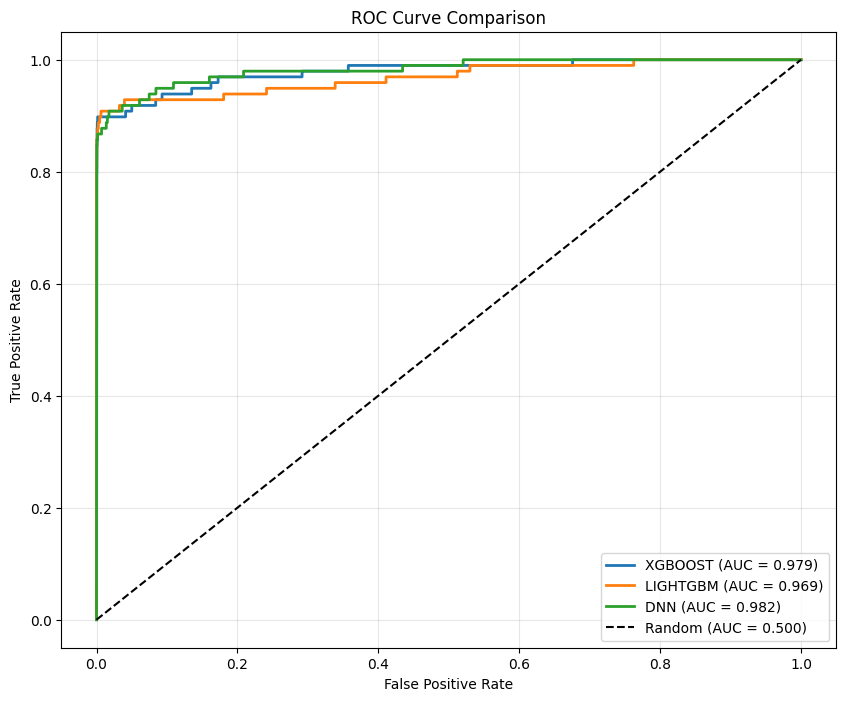

In [16]:
# ROC Curve Comparison for all models
plt.figure(figsize=(10, 8))

# Plot each model's ROC curve
for model_name, result in comparator.results.items():
    y_pred_proba = result['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name.upper()} (AUC = {roc_auc:.3f})', linewidth=2)

# Add DNN if available
if 'dnn_model' in locals():
    dnn_pred_proba = dnn_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, dnn_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'DNN (AUC = {roc_auc:.3f})', linewidth=2, linestyle='--')

# Plot random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig('/kaggle/working/roc_curve_comparison.png', dpi=120, bbox_inches='tight')
plt.show()

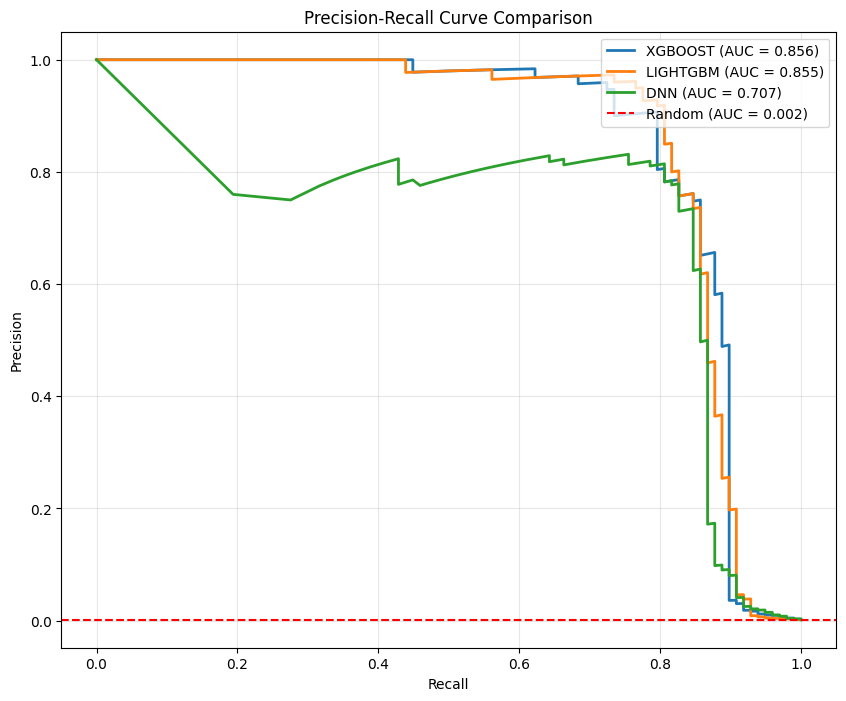

In [17]:
# Precision-Recall Curve Comparison
plt.figure(figsize=(10, 8))

# Plot each model's PR curve
for model_name, result in comparator.results.items():
    y_pred_proba = result['y_pred_proba']
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name.upper()} (AUC = {pr_auc:.3f})', linewidth=2)

# Add DNN if available
if 'dnn_model' in locals():
    dnn_pred_proba = dnn_model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, dnn_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'DNN (AUC = {pr_auc:.3f})', linewidth=2, linestyle='--')

# Plot random baseline
random_baseline = y_test.mean()
plt.axhline(y=random_baseline, color='r', linestyle='--', 
            label=f'Random (AUC = {random_baseline:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.savefig('/kaggle/working/pr_curve_comparison.png', dpi=120, bbox_inches='tight')
plt.show()

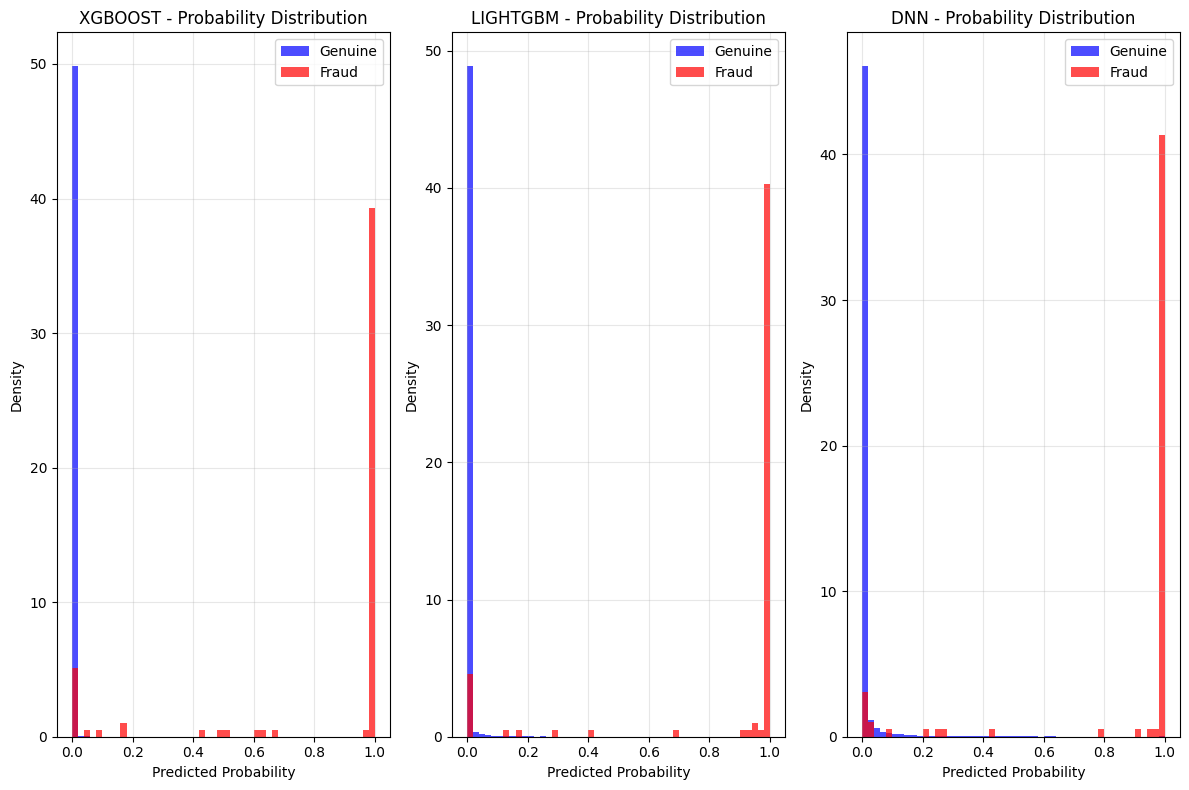

In [24]:
# Probability distribution for genuine vs fraudulent transactions
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes = axes.flatten()

model_names = list(comparator.results.keys())[:3]  

for i, model_name in enumerate(model_names):
    if i < len(axes):
        y_pred_proba = comparator.results[model_name]['y_pred_proba']
        
        # Get probabilities for each class
        genuine_probs = y_pred_proba[y_test == 0]
        fraud_probs = y_pred_proba[y_test == 1]
        
        # Plot histograms
        axes[i].hist(genuine_probs, bins=50, alpha=0.7, label='Genuine', color='blue', density=True)
        axes[i].hist(fraud_probs, bins=50, alpha=0.7, label='Fraud', color='red', density=True)
        
        axes[i].set_xlabel('Predicted Probability')
        axes[i].set_ylabel('Density')
        axes[i].set_title(f'{model_name.upper()} - Probability Distribution')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/probability_distributions.png', dpi=120, bbox_inches='tight')
plt.show()

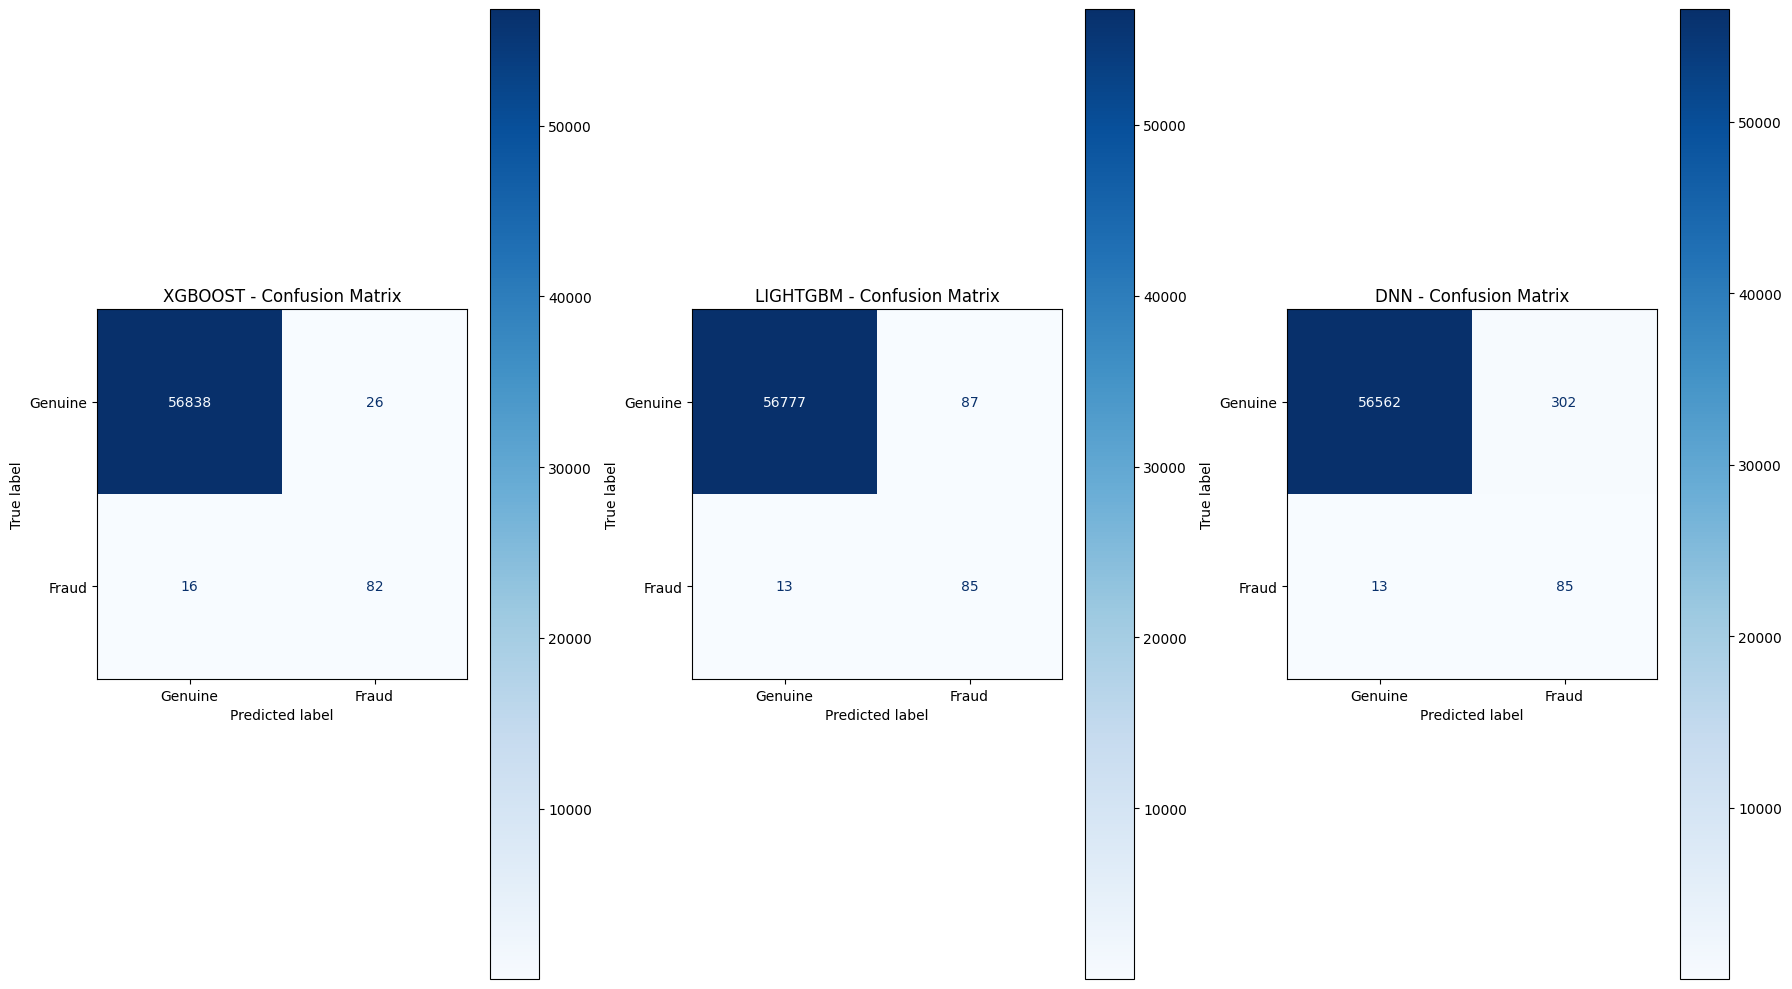

In [20]:
# Confusion matrices for each model
n_models = len(comparator.results)
if 'dnn_model' in locals():
    n_models += 1

fig, axes = plt.subplots(1, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (model_name, result) in enumerate(comparator.results.items()):
    if i < len(axes):
        y_pred = result['y_pred']
        cm = confusion_matrix(y_test, y_pred)
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                    display_labels=['Genuine', 'Fraud'])
        disp.plot(ax=axes[i], cmap='Blues', values_format='d')
        axes[i].set_title(f'{model_name.upper()} - Confusion Matrix')

# Add DNN confusion matrix if available
if 'dnn_model' in locals() and (i+1) < len(axes):
    dnn_pred = dnn_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, dnn_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                display_labels=['Genuine', 'Fraud'])
    disp.plot(ax=axes[i+1], cmap='Blues', values_format='d')
    axes[i+1].set_title('DNN - Confusion Matrix')

# Remove empty subplots
for j in range(i+2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('/kaggle/working/confusion_matrices.png', dpi=120, bbox_inches='tight')
plt.show()

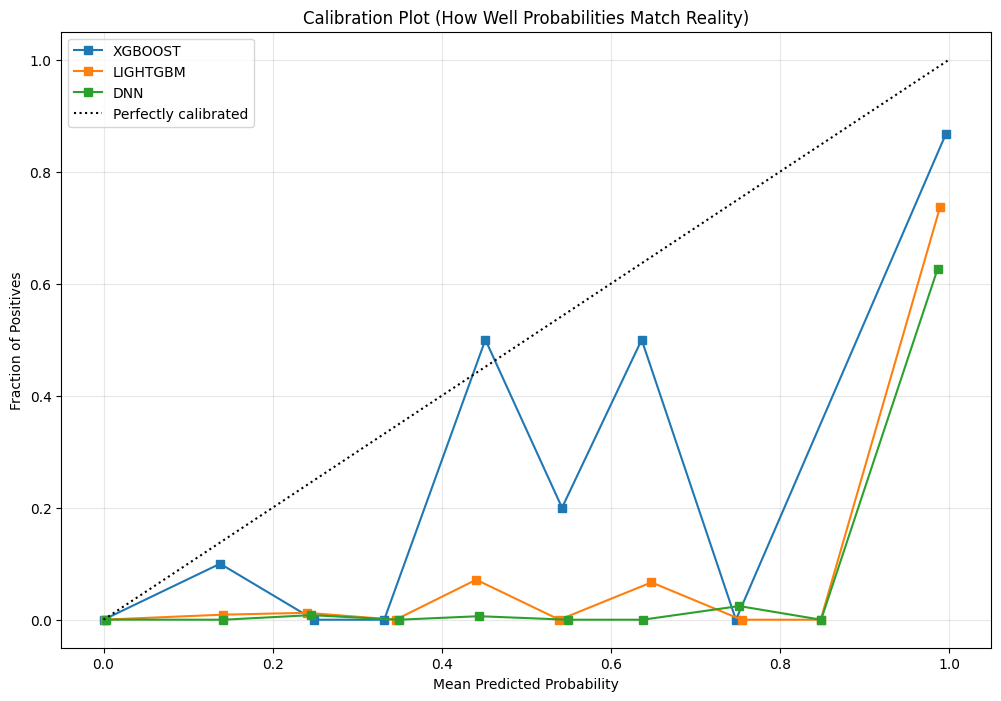

In [25]:
# Calibration plot (how well predicted probabilities match actual frequencies)
from sklearn.calibration import calibration_curve

plt.figure(figsize=(12, 8))

for model_name, result in comparator.results.items():
    y_pred_proba = result['y_pred_proba']
    
    # Use calibration curve
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10, strategy='uniform')
    
    plt.plot(mean_predicted_value, fraction_of_positives, 's-', 
             label=f'{model_name.upper()}')

# Add DNN if available
if 'dnn_model' in locals():
    dnn_pred_proba = dnn_model.predict_proba(X_test_scaled)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, dnn_pred_proba, n_bins=10, strategy='uniform')
    plt.plot(mean_predicted_value, fraction_of_positives, 's-', 
             label='DNN', linestyle='--')

# Add perfect calibration line
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot (How Well Probabilities Match Reality)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/kaggle/working/calibration_plot.png', dpi=120, bbox_inches='tight')
plt.show()

In [26]:
# Create a quick summary table
summary_data = []
for model_name, result in comparator.results.items():
    y_pred = result['y_pred']
    y_pred_proba = result['y_pred_proba']
    
    summary_data.append({
        'Model': model_name.upper(),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba),
        'AUC-PR': average_precision_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    })

summary_df = pd.DataFrame(summary_data)
print("📊 Quick Performance Summary:")
print(summary_df.to_string(index=False, float_format='%.4f'))

📊 Quick Performance Summary:
   Model  AUC-ROC  AUC-PR  Precision  Recall     F1
 XGBOOST   0.9789  0.8560     0.7593  0.8367 0.7961
LIGHTGBM   0.9687  0.8550     0.4942  0.8673 0.6296
     DNN   0.9820  0.6849     0.2196  0.8673 0.3505


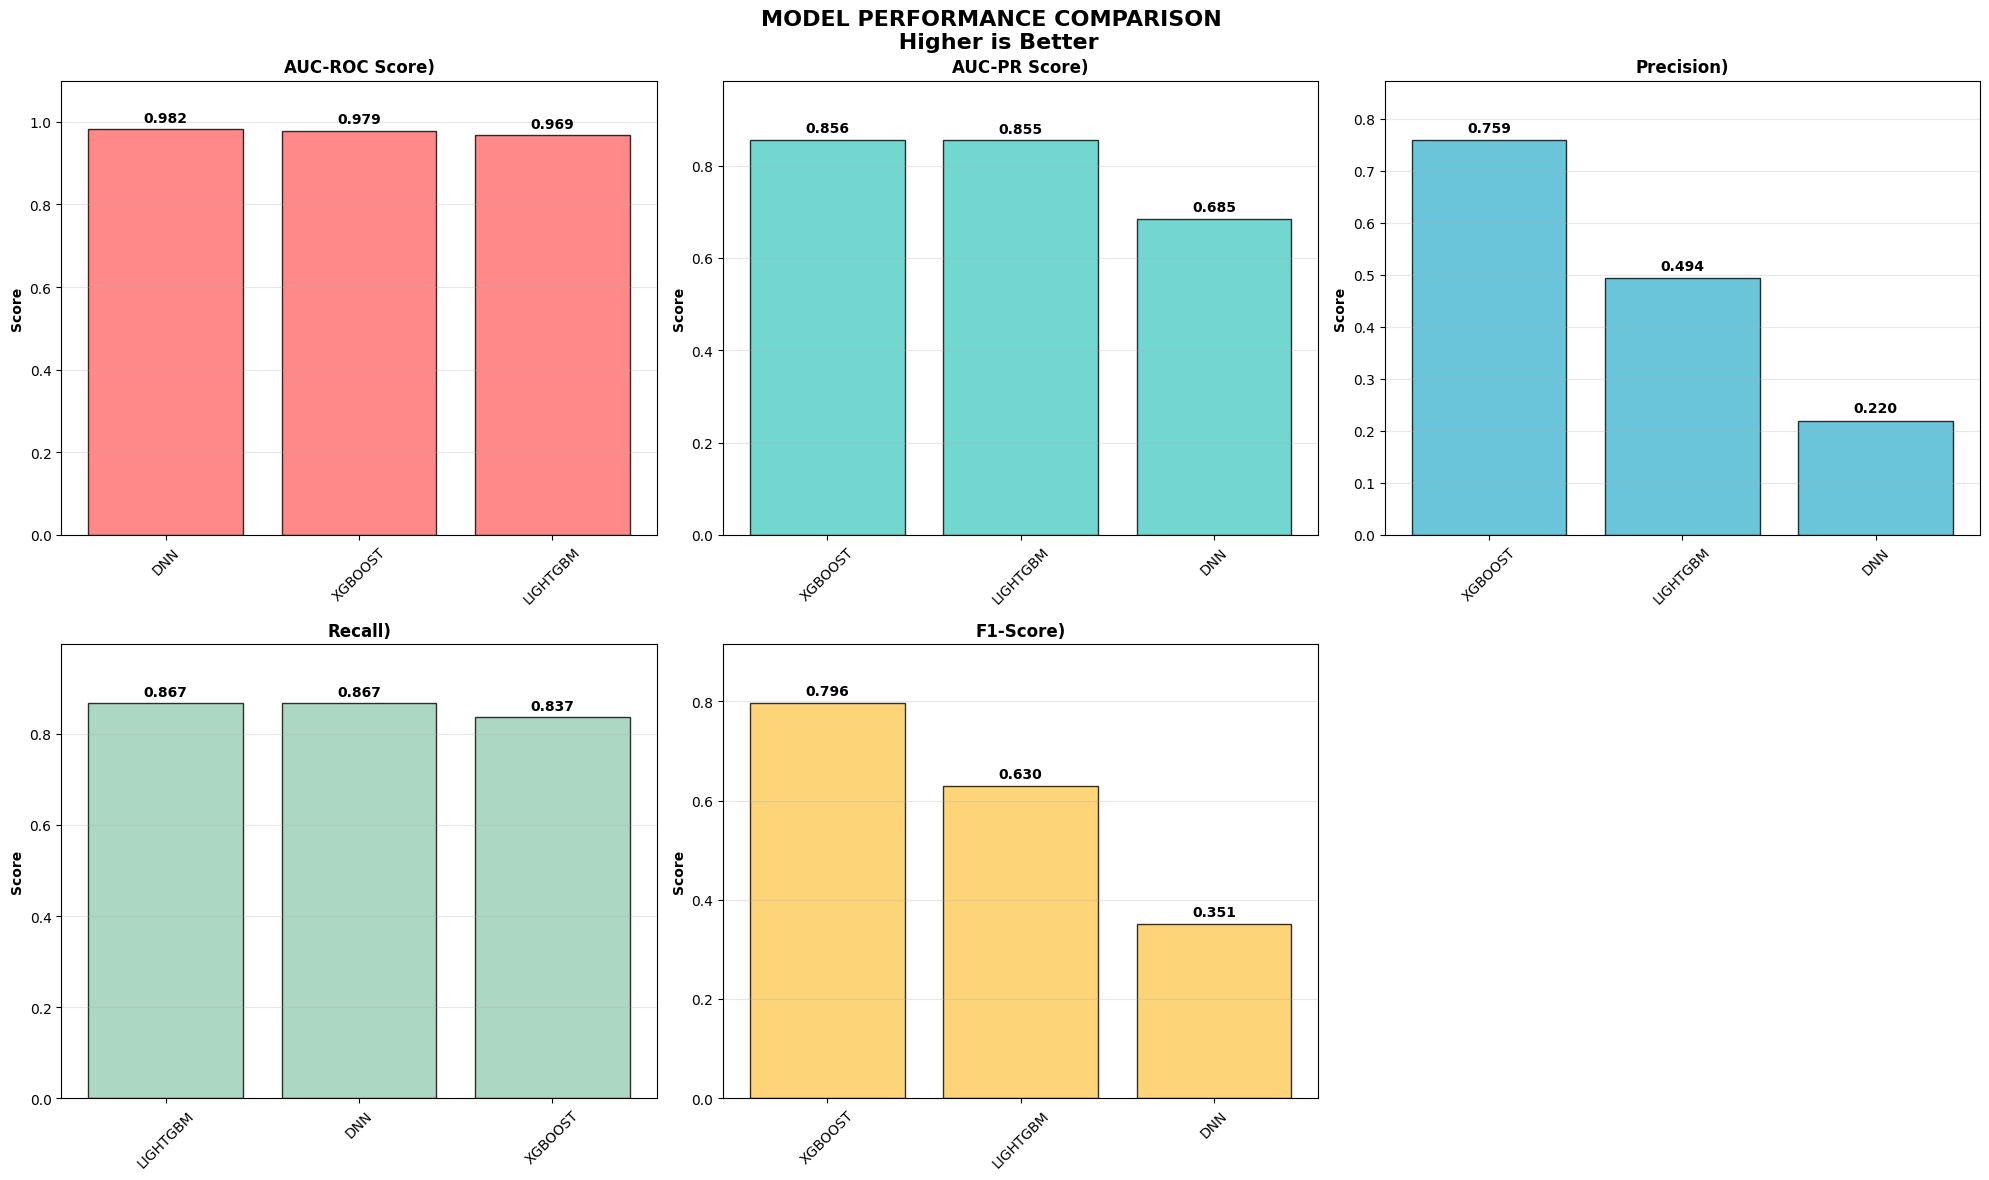

In [29]:
# Create performance metrics comparison for bar charts
metrics_data = []
for model_name, result in comparator.results.items():
    y_pred = result['y_pred']
    y_pred_proba = result['y_pred_proba']
    
    metrics_data.append({
        'Model': model_name.upper(),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba),
        'AUC-PR': average_precision_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

# Add DNN if available
if 'dnn_model' in locals():
    dnn_pred = dnn_model.predict(X_test_scaled)
    dnn_pred_proba = dnn_model.predict_proba(X_test_scaled)[:, 1]
    metrics_data.append({
        'Model': 'DNN',
        'AUC-ROC': roc_auc_score(y_test, dnn_pred_proba),
        'AUC-PR': average_precision_score(y_test, dnn_pred_proba),
        'Precision': precision_score(y_test, dnn_pred),
        'Recall': recall_score(y_test, dnn_pred),
        'F1-Score': f1_score(y_test, dnn_pred)
    })

metrics_df = pd.DataFrame(metrics_data)

# Create beautiful bar charts
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

metrics_to_plot = ['AUC-ROC', 'AUC-PR', 'Precision', 'Recall', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
titles = ['AUC-ROC Score', 'AUC-PR Score', 'Precision', 'Recall', 'F1-Score']

for i, (metric, color, title) in enumerate(zip(metrics_to_plot, colors, titles)):
    if i < len(axes):
        # Sort by metric value (descending)
        sorted_df = metrics_df.sort_values(metric, ascending=False)
        
        bars = axes[i].bar(sorted_df['Model'], sorted_df[metric], color=color, alpha=0.8, edgecolor='black')
        axes[i].set_title(f'{title})', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Score', fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3, axis='y')
        
        # Add values on top of bars
        for bar, value in zip(bars, sorted_df[metric]):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                        f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Set y-axis limit to show values clearly
        axes[i].set_ylim(0, min(1.1, sorted_df[metric].max() * 1.15))

# Remove empty subplot if needed
if len(metrics_to_plot) < len(axes):
    fig.delaxes(axes[-1])

plt.suptitle('MODEL PERFORMANCE COMPARISON \n Higher is Better', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('/kaggle/working/performance_bar_charts.png', dpi=120, bbox_inches='tight')
plt.show()

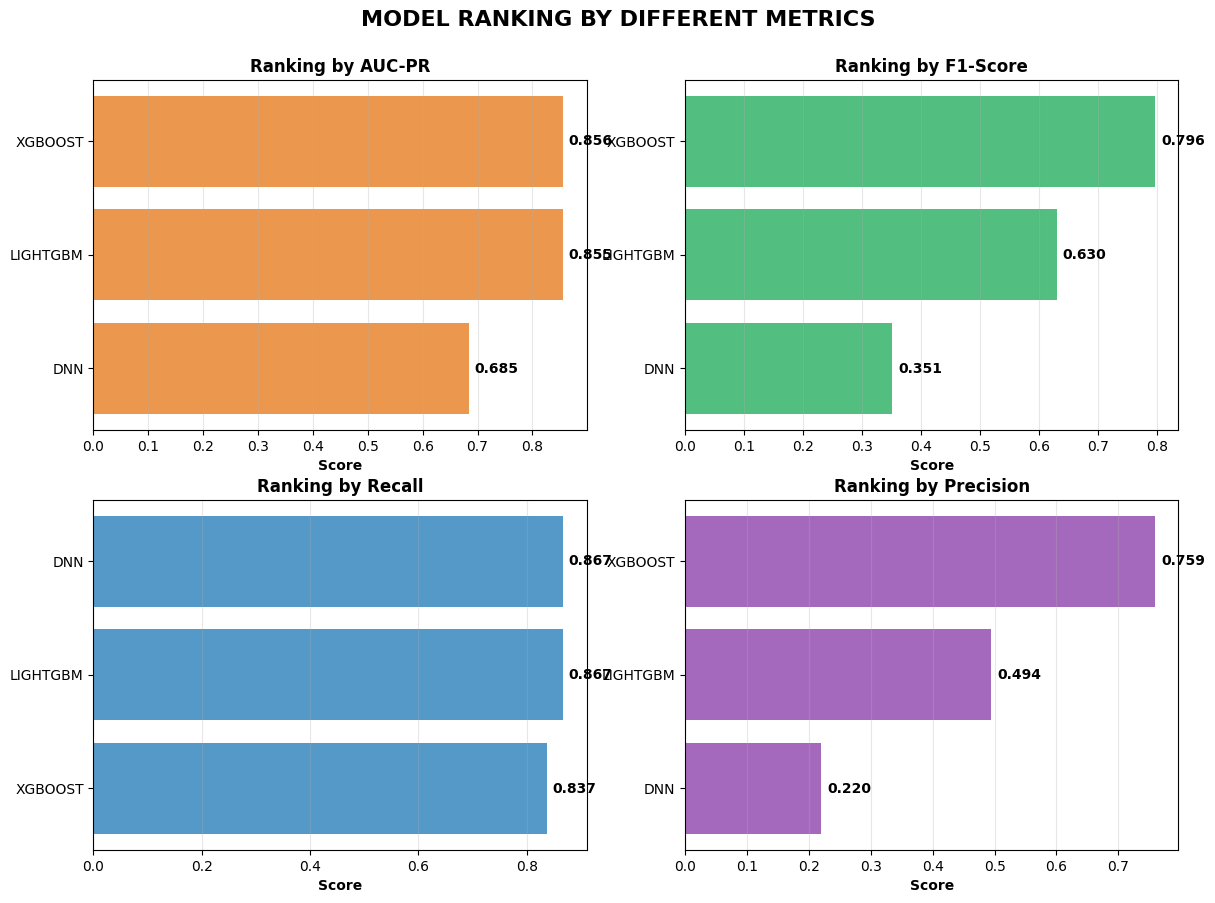

In [31]:
# Model ranking by different metrics
plt.figure(figsize=(14, 10))

metrics_for_ranking = ['AUC-PR', 'F1-Score', 'Recall', 'Precision']
colors = ['#E67E22', '#27AE60', '#2980B9', '#8E44AD']

for i, metric in enumerate(metrics_for_ranking):
    plt.subplot(2, 2, i+1)
    
    # Sort by this metric
    sorted_df = metrics_df.sort_values(metric, ascending=True)  # ascending for horizontal bars
    
    bars = plt.barh(sorted_df['Model'], sorted_df[metric], color=colors[i], alpha=0.8)
    plt.xlabel('Score', fontweight='bold')
    plt.title(f'Ranking by {metric}', fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add values on bars
    for bar, value in zip(bars, sorted_df[metric]):
        plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', ha='left', va='center', fontweight='bold')

plt.suptitle('MODEL RANKING BY DIFFERENT METRICS', fontsize=16, fontweight='bold', y=0.95)
# plt.tight_layout()
plt.savefig('/kaggle/working/model_ranking_bars.png', dpi=120, bbox_inches='tight')
plt.show()

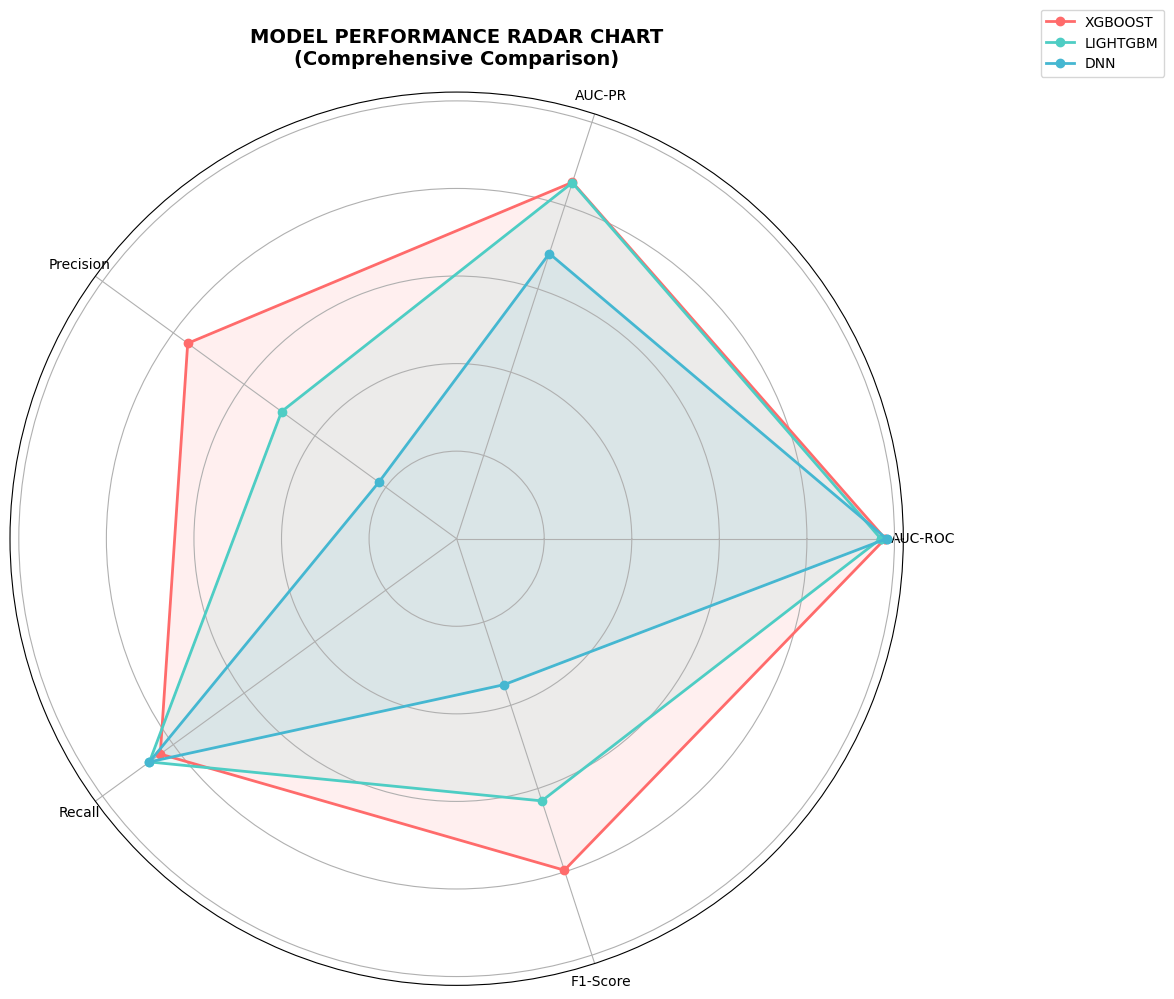

In [32]:
# Radar chart for comprehensive comparison
from math import pi

# Normalize metrics for radar chart (0-1 scale)
radar_metrics = ['AUC-ROC', 'AUC-PR', 'Precision', 'Recall', 'F1-Score']
radar_df = metrics_df[['Model'] + radar_metrics].copy()

# Create radar chart
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, polar=True)

# Calculate angles for each metric
angles = [n / float(len(radar_metrics)) * 2 * pi for n in range(len(radar_metrics))]
angles += angles[:1]  # Close the circle

# Plot each model
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']
for i, (idx, row) in enumerate(radar_df.iterrows()):
    values = row[radar_metrics].values.tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model'], color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# Add metric labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_metrics)
ax.set_yticklabels([])
ax.set_title('MODEL PERFORMANCE RADAR CHART\n(Comprehensive Comparison)', 
             fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.savefig('/kaggle/working/radar_chart.png', dpi=120, bbox_inches='tight')
plt.show()

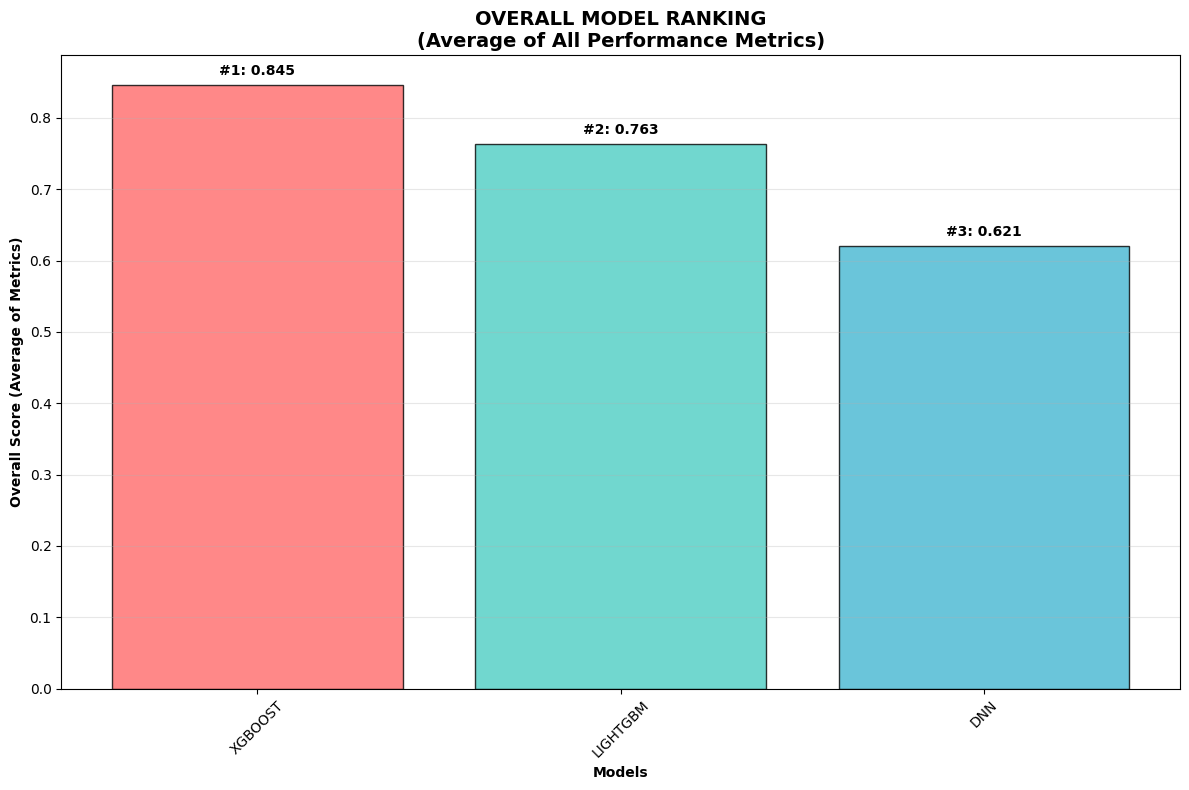

In [33]:
# Simple overall ranking (average of all metrics)
plt.figure(figsize=(12, 8))

# Calculate overall score (average of normalized metrics)
metrics_to_average = ['AUC-ROC', 'AUC-PR', 'Precision', 'Recall', 'F1-Score']
metrics_df['Overall_Score'] = metrics_df[metrics_to_average].mean(axis=1)

# Sort by overall score
sorted_df = metrics_df.sort_values('Overall_Score', ascending=False)

bars = plt.bar(sorted_df['Model'], sorted_df['Overall_Score'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3'],
               alpha=0.8, edgecolor='black')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Overall Score (Average of Metrics)', fontweight='bold')
plt.title('OVERALL MODEL RANKING\n(Average of All Performance Metrics)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add values and ranking numbers
for i, (bar, score) in enumerate(zip(bars, sorted_df['Overall_Score'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'#{i+1}: {score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('/kaggle/working/overall_ranking.png', dpi=120, bbox_inches='tight')
plt.show()